<h1 align="center">Auto Encoderによるクレジットカード詐欺分類</h1>

## はじめに

By definition, machine learning can be defined as a complex process of learning the best possible and most relevant patterns, relationships, or associations from a dataset which can be used to predict the outcomes on unseen data. Broadly, their exists three different machine learning processes: 

**1. Supervised Learning** is a process of training a machine learning model on a labelled dataset ie. a dataset in which the target variable is known. In this technique, the model aims to find the relationships among the independent and dependent variable. Examples of supervised learning are classification, regression and forecasting. 

**2. Unsupervised Learning** is a process of training a machine learning model on a dataset in which target variable is not known. In this technique, the model aims to find the most relevant patterns in the data or the segments of data. Examples of unsupervised learning are clustering, segmentations, dimensionality reduction etc. 

**3. Semi-Supervised Learning** is combination of supervised and unsupervised learning processes in which the unlabelled data is used for training a model as well. In this approach, the properties of unspervised learning are used to learn the best possible representation of data and the properties of supervised learning are used to learn the relationships in the representations which are then used to make predictions. 

<p align="center">In this kernel, I have explained how to perform classification task using semi supervised learning approach. This approach makes use of autoencoders to learn the representation of the data then a simple linear classifier is trained to classify the dataset into respective classes.

定義により、機械学習は、見えないデータの結果を予測するために使用できるデータセットから、可能な限り最も関連性の高いパターン、関係、または関連性を学習する複雑なプロセスとして定義できます。広くは、3つの異なる機械学習プロセスが存在します。

1. 教師あり学習は、ラベル付きデータセットで機械学習モデルをトレーニングするプロセスです。ターゲット変数が既知のデータセット。この手法では、モデルは独立変数と従属変数の間の関係を見つけることを目的としています。教師あり学習の例は、分類、回帰、予測です。 

2. 教師なし学習は、ターゲット変数が不明なデータセットで機械学習モデルをトレーニングするプロセスです。この手法では、モデルはデータまたはデータのセグメントで最も関連性の高いパターンを見つけることを目的としています。教師なし学習の例には、クラスタリング、セグメンテーション、次元削減などがあります。 

3. 半教師あり学習は、教師なし学習プロセスと教師なし学習プロセスの組み合わせで、ラベルのないデータがモデルのトレーニングにも使用されます。このアプローチでは、非最適化学習のプロパティを使用してデータの可能な限り最良の表現を学習し、監視学習のプロパティを使用して、予測の作成に使用される表現の関係を学習します。

このカーネルでは、半教師あり学習アプローチを使用して分類タスクを実行する方法を説明しました。このアプローチでは、オートエンコーダーを使用してデータの表現を学習し、データセットをそれぞれのクラスに分類するために単純な線形分類器をトレーニングします。

 
<br>
<h1 align="center">Fraud Detection using Semi Supervised Learning</h1>  

I am using the dataset of [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud) by ULB machine learning group. Later, I am also applying the same technique on [Titanic](https://www.kaggle.com/c/titanic) dataset. A number of kagglers have shared different approaches such as dataset balancing, anomaly detection, boosting models, deep learning etc but this approach is different. 

### Contents 

1. Dataset Preparation  
2. Visualize Fraud Vs Non Fraud Transactions  
3. AutoEncoders : Latent Representation Extraction  
4. Obtain the Latent Representations  
5. Visualize Latent Representations : Fraud vs Non Fraud  
6. Simple Linear Classifier  
7. Applying the same technique on Titanic Dataset


### 目次
1. データセットの準備
1. 不正取引と非不正取引の視覚化
1. AutoEncoders：潜在表現の抽出
1. 潜在表現の取得
1. 潜在表現の視覚化：詐欺と非詐欺
1. 単純線形分類器

## 1. Dataset Preparation

First, we will load all the required libraries and load the dataset using pandas dataframe. 
 

最初に、必要なすべてのライブラリをロードし、pandasデータフレームを使用してデータセットをロードします。

In [4]:
!pip3 install keras
!pip3 install tensorflow==1.15

You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 412.3MB 125kB/s  eta 0:00:01.6MB/s eta 0:00:54    | 10.1MB 7.6MB/s eta 0:00:54                    | 14.3MB 7.6MB/s eta 0:00:53[K     |█▎                              | 16.9MB 7.6MB/s eta 0:00:53     |█▋                              | 20.5MB 7.6MB/s eta 0:00:52| 28.9MB 7.6MB/s eta 0:00:510:51                        | 38.6MB 7.6MB/s eta 0:00:50   |███▏                            | 40.8MB 7.6MB/s eta 0:00:50                         | 51.4MB 21.9MB/s eta 0:00:17/s eta 0:00:17████▌                           | 57.9MB 21.9MB/s eta 0:00:17███▏                          | 67.1MB 21.9MB/s eta 0:00:16      | 69.4MB 21.9MB/s eta 0:00:16 | 86.2MB 31.1MB/s eta 0:00:11    |██████▉                         | 88.6MB 31.1MB/s eta 0:00:11��███▏                        | 92.2MB 31.1MB/s eta 0:00:1111.1MB/s eta 0:00:11                  | 103.1MB 31.1MB/s eta 0:00:10| 106.2MB 31.1MB/s eta 0:00:10�

     |████████████████████████████████| 1.3MB 24.2MB/s eta 0:00:01
     |████████████████████████████████| 2.7MB 20.8MB/s eta 0:00:01�█            | 1.7MB 20.8MB/s eta 0:00:01
     |████████████████████████████████| 71kB 19.7MB/s eta 0:00:01
     |████████████████████████████████| 3.8MB 34.2MB/s eta 0:00:01                         | 778kB 34.2MB/s eta 0:00:01
     |████████████████████████████████| 92kB 23.9MB/s eta 0:00:01
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=b7815dc2d868448a0ece7d3b742042b071020b30396f424c6b37f71513b706da
  Stored in directory: /home/cdsw/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Created wheel for wrapt: filename=wrapt-1.12.1-cp36-cp36m-linux_x86_64.whl size=69771 sha256=c3696a055f7352493acbc2a7f52ef6cfbacb67b1c12d0fbce7cfa2b5d89a558a
  Stored in directory: /home/cdsw/.cache/pip/wheels/b1/c2/ed/d62208260edbd3fa7156545c00ef966f45f2063d0a84f8208a
  Created wheel for absl-py: filename=absl

In [2]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(203)

data = pd.read_csv("../input/creditcardfraud/creditcard.csv")
data["Time"] = data["Time"].apply(lambda x : x / 3600 % 24)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The dataset consists of 28 anonymized variables, 1 "amount" variable, 1 "time" variable and 1 target variable - Class. Let's look at the distribution of target.

データセットは、28個の匿名変数、1個の「金額」変数、1個の「時間」変数、1個のターゲット変数-クラスで構成されています。ターゲットの分布を見てみましょう。

In [7]:
vc = data['Class'].value_counts().to_frame().reset_index()
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(data), 2))
vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})
vc

,Target,Count,percent
0,0,284315,99.83
1,1,492,0.17


One of the biggest challenge of this problem is that the **target is highly imbalanced** as only **0.17 %** cases are fraud transactions. But the advantage of the representation learning approach is that it is still able to handle such imbalance nature of the problems. We will look how.  For our use-case let's take only about 1000 rows of non-fraud transactions. 

この問題の最大の課題の1つは、0.17％のケースのみが不正取引であるため、ターゲットのバランスが非常に悪いことです。しかし、表現学習アプローチの利点は、問題のこのような不均衡な性質をまだ処理できることです。方法を見ていきましょう。ユースケースでは、詐欺以外のトランザクションを約1000行だけ取ります。

## Consider only 1000 rows of non fraud cases

In [8]:
non_fraud = data[data['Class'] == 0].sample(1000)
fraud = data[data['Class'] == 1]

df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
X = df.drop(['Class'], axis = 1).values
Y = df["Class"].values

## 2. 可視化

Let's visualize the nature of fraud and non-fraud transactions using T-SNE. T-SNE (t-Distributed Stochastic Neighbor Embedding) is a dataset decomposition technique which reduced the dimentions of data and produces only top n components with maximum information.  

Every dot in the following represents a transaction. Non Fraud transactions are represented as Green while Fraud transactions are represented as Red. The two axis are the components extracted by tsne.

T-SNEを使用して、詐欺および非詐欺取引の性質を視覚化しましょう。T-SNE（t-Distributed Stochastic Neighbor Embedding）は、データの次元を減らし、最大情報を持つ上位n個のコンポーネントのみを生成するデータセット分解手法です。

ドットは、トランザクションを表します。非不正取引は緑で表され、不正取引は赤で表されます。2つの軸は、tsneによって抽出されたコンポーネントです。

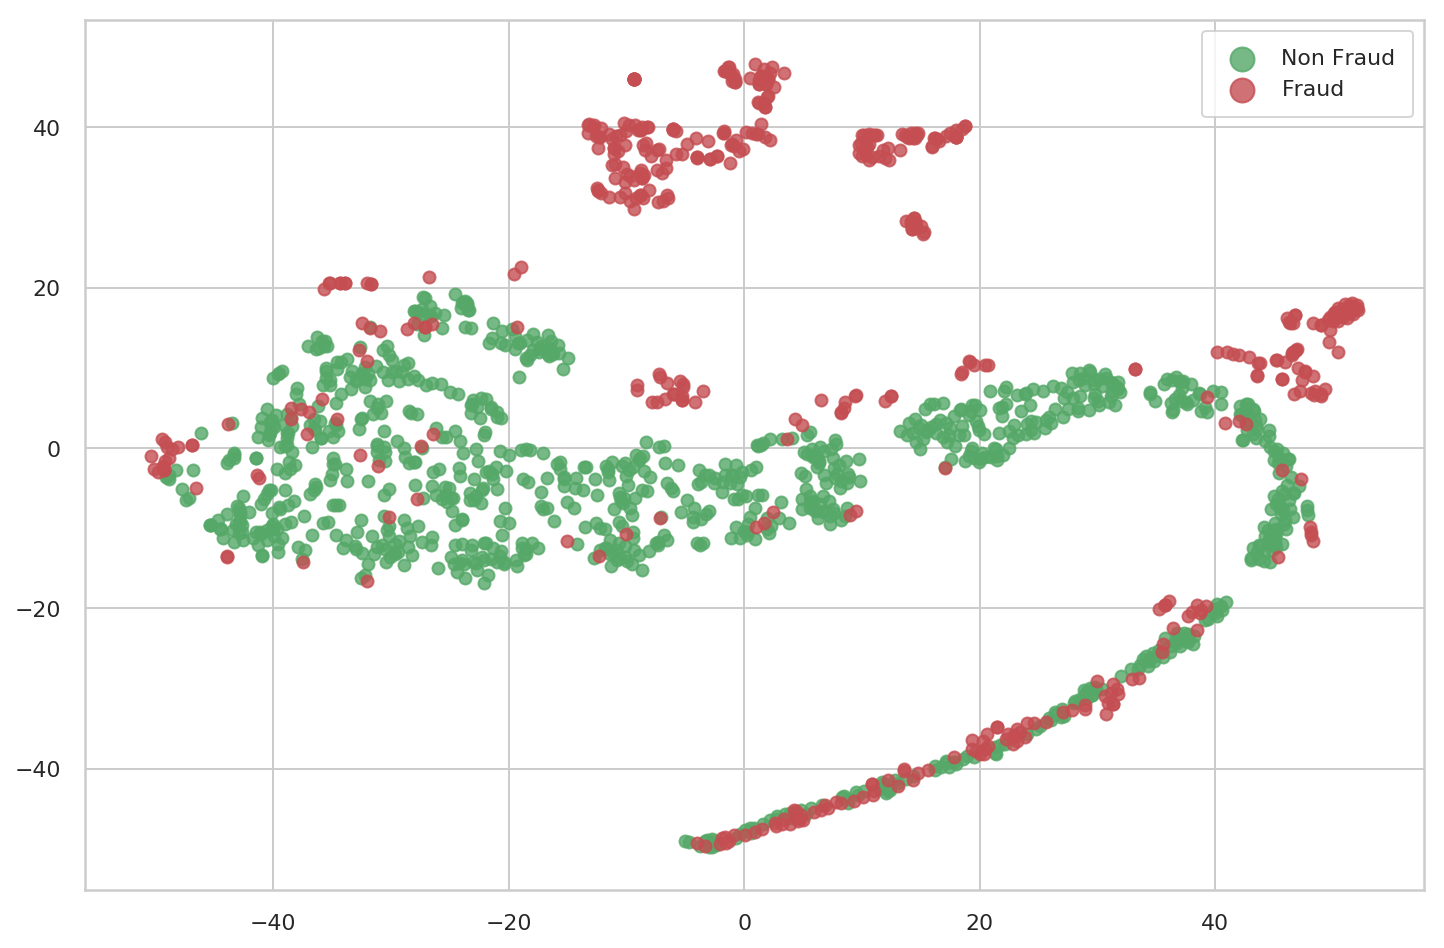

In [9]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, Y, "original.png")

From the above graph we can observe that there are many non_fraud transactions which are very close to fraud transactions, thus are difficult to accurately classify from a model.

上記のグラフから、詐欺取引に非常に近い多くのnon_fraud取引があるため、モデルから正確に分類することは困難であることがわかります。

## 3. Auto Encoders

<br>
**What are Autoencoders?** - Autoencoders are a special type of neural network architectures in which the output is same as the input. Autoencoders are trained in an unsupervised manner in order to learn the exteremely low level repersentations of the input data. These low level features are then deformed back to project the actual data. An autoencoder is a regression task where the network is asked to predict its input (in other words, model the identity function). These networks has a tight bottleneck of a few neurons in the middle, forcing them to create effective representations that compress the input into a low-dimensional code that can be used by the decoder to reproduce the original input. 

**More about Autoencoders** - If you want to gain more understanding about autoencoders, you can refer to the following kernel : https://www.kaggle.com/shivamb/how-autoencoders-work-intro-and-usecases

オートエンコーダーとは何か？-オートエンコーダは、出力が入力と同じである特別なタイプのニューラルネットワークアーキテクチャです。オートエンコーダーは、入力データの非常に低いレベルの再現を学習するために、教師なしの方法で訓練されます。これらの低レベルフィーチャは、実際のデータを投影するために変形されます。オートエンコーダは、ネットワークが入力を予測するように求められる回帰タスクです（言い換えれば、アイデンティティ関数をモデル化する）。これらのネットワークには、中央に数個のニューロンのタイトなボトルネックがあり、デコーダーが元の入力を再現するために使用できる低次元コードに入力を圧縮する効果的な表現を作成する必要があります。

オートエンコーダーの詳細 - オートエンコーダーについてさらに理解を深めたい場合は、次のカーネルを参照できます：https : //www.kaggle.com/shivamb/how-autoencoders-work-intro-and-usecases


![](https://i.imgur.com/Rrmaise.png)

We will create an autoencoder model in which we only show the model non-fraud cases. The model will try to learn the best representation of non-fraud cases. The same model will be used to generate the representations of fraud cases and we expect them to be different from non-fraud ones. 

Create a network with one input layer and one output layer having identical dimentions ie. the shape of non-fraud cases. We will use keras package.

不正でないモデルのみを表示するオートエンコーダーモデルを作成します。モデルは、不正でないケースの最適な表現を学習しようとします。同じモデルが詐欺事件の表現を生成するために使用され、我々はそれらが非詐欺事件とは異なることを期待します。

同一の次元を持つ1つの入力層と1つの出力層を持つネットワークを作成します。非詐欺事件の形。kerasパッケージを使用します。

In [10]:
## input layer 
input_layer = Input(shape=(X.shape[1],))

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='relu')(encoded)

## decoding part
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Create the model architecture by compiling input layer and output layers. Also add the optimizer and loss function, I am using "adadelta" as the optimizer and "mse" as the loss function.

入力層と出力層をコンパイルして、モデルアーキテクチャを作成します。また、オプティマイザーと損失関数を追加します。オプティマイザーとして「adadelta」を、損失関数として「mse」を使用しています。

In [11]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

Before training, let's perform min max scaling. 

トレーニングの前に、最小最大スケーリングを実行しましょう。

In [12]:
x = data.drop(["Class"], axis=1)
y = data["Class"].values

x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]

The beauty of this approach is that we do not need too many samples of data for learning the good representations. We will use **only 2000 rows** of non fraud cases to train the autoencoder. Additionally, We do not need to run this model for a large number of epochs. 

**Explanation:** The choice of small samples from the original dataset is based on the intuition that one class characteristics (non fraud) will differ from that of the other (fraud). To distinguish these characteristics we need to show the autoencoders only one class of data. This is because the autoencoder will try to learn only one class and automaticlly distinuish the other class.

このアプローチの利点は、適切な表現を学習するためにあまり多くのデータサンプルを必要としないことです。オートエンコーダをトレーニングするために、不正でないケースを2000行のみ使用します。さらに、多数のエポックに対してこのモデルを実行する必要はありません。

説明：元のデータセットからの小さなサンプルの選択は、1つのクラスの特性（非詐欺）が他のクラスの特性（詐欺）と異なるという直感に基づいています。これらの特性を区別するには、オートエンコーダーに1つのクラスのデータのみを表示する必要があります。これは、オートエンコーダが1つのクラスのみを学習し、他のクラスを自動的に区別しようとするためです。

In [13]:
autoencoder.fit(x_norm[0:2000], x_norm[0:2000], 
                batch_size = 256, epochs = 10, 
                shuffle = True, validation_split = 0.20);


Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 0s 135us/step - loss: 0.7219 - val_loss: 0.4842
Epoch 2/10
1600/1600 [==============================] - 0s 13us/step - loss: 0.4609 - val_loss: 0.3261
Epoch 3/10
1600/1600 [==============================] - 0s 12us/step - loss: 0.3052 - val_loss: 0.2209
Epoch 4/10
1600/1600 [==============================] - 0s 12us/step - loss: 0.1992 - val_loss: 0.1235
Epoch 5/10
1600/1600 [==============================] - 0s 12us/step - loss: 0.1296 - val_loss: 0.1266
Epoch 6/10
1600/1600 [==============================] - 0s 12us/step - loss: 0.1312 - val_loss: 0.0887
Epoch 7/10
1600/1600 [==============================] - 0s 12us/step - loss: 0.0993 - val_loss: 0.0966
Epoch 8/10
1600/1600 [==============================] - 0s 12us/step - loss: 0.1122 - val_loss: 0.0792
Epoch 9/10
1600/1600 [==============================] - 0s 12us/step - loss: 0.0852 - val_loss: 0.0791
Epoch 10/10
1600/1600 [=

## 4. 潜在表現の獲得

Now, the model is trained. We are intereseted in obtaining **latent representation of the input** learned by the model. This can be accessed by the weights of the trained model. We will create another network containing sequential layers, and we will only add the trained weights till the third layer where latent representation exists. 


これで、モデルがトレーニングされました。モデルによって学習された入力の潜在的な表現を獲得することは興味深い試みです。これは、訓練されたモデルの重みによってアクセスできます。シーケンシャルレイヤーを含む別のネットワークを作成し、潜在表現が存在する3番目のレイヤーまでトレーニング済みの重みのみを追加します。

In [14]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

Generate the hidden representations of two classes : non-fraud and fraud by predicting the raw inputs using the above model.

上記のモデルを使用して生の入力を予測することにより、2つのクラスの非表示と非表示を生成します。

In [15]:
norm_hid_rep = hidden_representation.predict(x_norm[:3000])
fraud_hid_rep = hidden_representation.predict(x_fraud)

## 5. 潜在表現の視覚化

Now we will create a training dataset using the latent representations obtained and let's visualize the nature of fraud vs non-fraud cases. 

ここで、取得した潜在表現を使用してトレーニングデータセットを作成し、不正行為と非不正行為の性質を視覚化します。

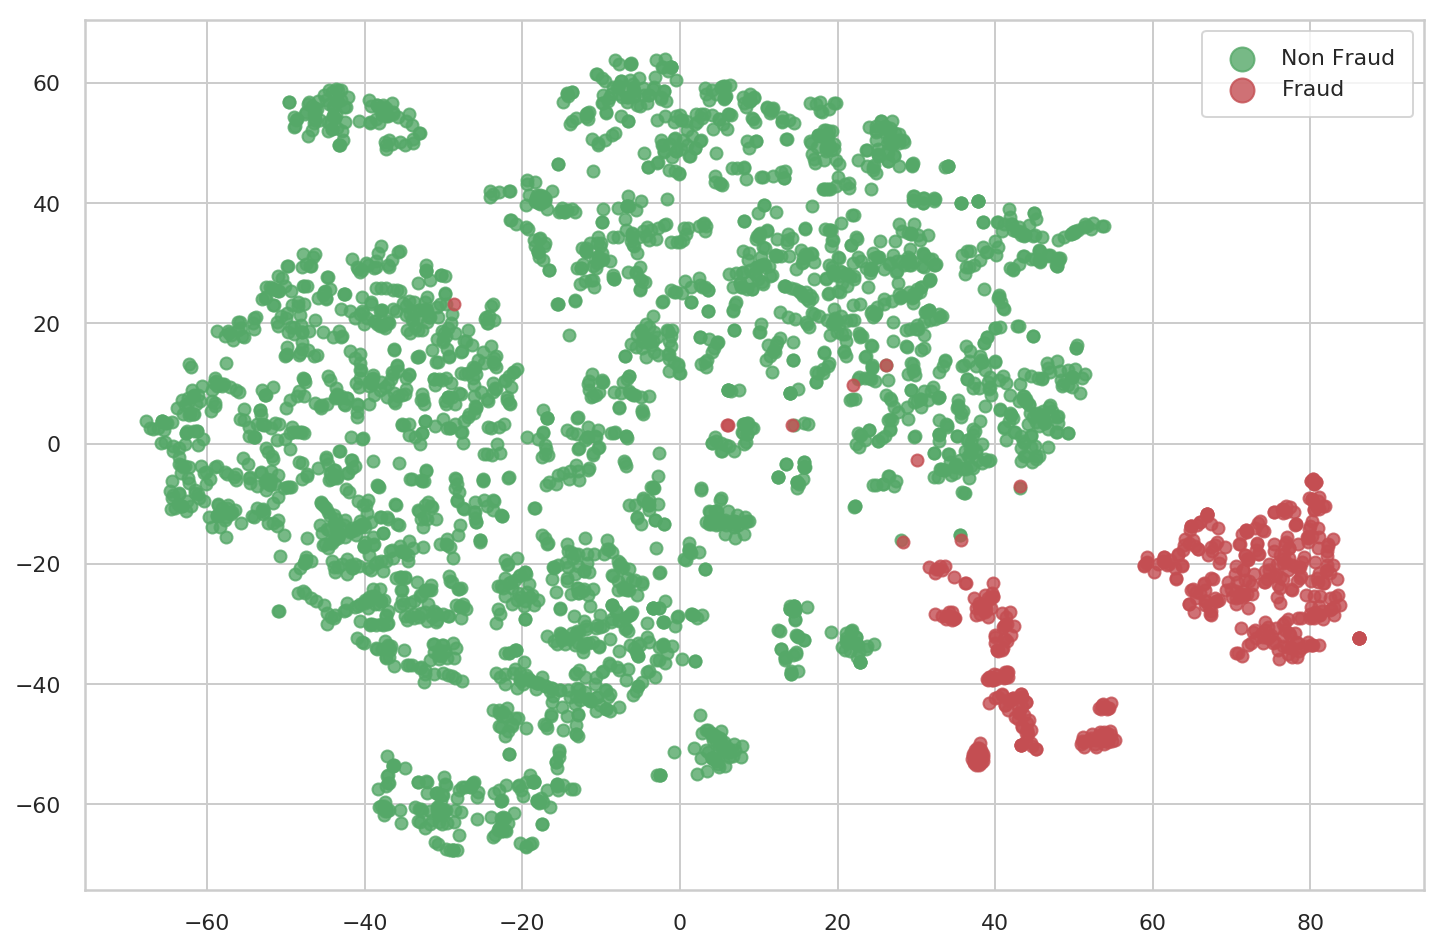

In [16]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
tsne_plot(rep_x, rep_y, "latent_representation.png")

What a perfect graph, we can observe that now fraud and non-fraud transactions are pretty visibile and are linearly separable. Now we dont need any complex model to classify this, even the simpler models can be used to predict.  Here is the before and after view of Fraud and Non Fraud transactions.

先のグラフと比べて明確な向上が見て取れます。詐欺と非詐欺のトランザクションの境界はかなり明確であり、直線的に分離可能であることがわかります。これを分類するために複雑なモデルは必要ありません。より単純なモデルでも予測に使用できます。詐欺および非詐欺取引の前後のビューを次に示します。

In [17]:
from IPython.display import display, Image, HTML
display(HTML("""<table align="center">
<tr ><td><b>Actual Representation (Before) </b></td><td><b>Latent Representation (Actual)</b></td></tr>
<tr><td><img src='original.png'></td><td>
             <img src='latent_representation.png'></td></tr></table>"""))

Actual Representation (Before),Latent Representation (Actual)
,


Now, we can just train a simple linear classifier on the dataset. 

これで、データセットで単純な線形分類器をトレーニングできます。

## 6. 単純な線形分類器（Linear Classifier）

In [18]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))


Classification Report: 
             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99       754
        1.0       1.00      0.87      0.93       119

avg / total       0.98      0.98      0.98       873


Accuracy Score:  0.9828178694158075


## 7. Applying to a different dataset : Titanic 

Let's Apply this approach to another dataset. I will use the popular titanic dataset for this purpose.

In [3]:
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")

Performing Some Feature Engineering Used in this Competition. The following Feature Engineering Code is derived from this [kernel](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python) 

Feature Engineering Credits : 
1. https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
2. https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier

In [4]:
import re 
full_data = [train, test]

train['Name_length'] = train['Name'].apply(len)
test['Name_length'] = test['Name'].apply(len)
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)

for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
train['CategoricalAge'] = pd.cut(train['Age'], 5)

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

for dataset in full_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)    
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare']         = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare']         = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    dataset.loc[ dataset['Age'] <= 16, 'Age']        = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 ;

drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)
test  = test.drop(drop_elements, axis = 1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Next, define the autoencoder model

In [5]:
X = train.drop(["Survived"], axis=1)
y = train["Survived"]
y = y.values

## define the model
input_layer = Input(shape=(X.shape[1],))
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='relu')(encoded)
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)
output_layer = Dense(X.shape[1], activation='relu')(decoded)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train the model

In [6]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X.values)
X_scale = scaler.transform(X.values)
test_x_scale = scaler.transform(test.values)

x_perished, x_survived = X_scale[y == 0], X_scale[y == 1]
autoencoder.fit(x_perished, x_perished, epochs = 20, shuffle = True, validation_split = 0.25)


Train on 411 samples, validate on 138 samples
Epoch 1/20
411/411 [==============================] - 0s 552us/step - loss: 0.1511 - val_loss: 0.0999
Epoch 2/20
411/411 [==============================] - 0s 63us/step - loss: 0.0891 - val_loss: 0.0790
Epoch 3/20
411/411 [==============================] - 0s 62us/step - loss: 0.0724 - val_loss: 0.0692
Epoch 4/20
411/411 [==============================] - 0s 61us/step - loss: 0.0638 - val_loss: 0.0631
Epoch 5/20
411/411 [==============================] - 0s 61us/step - loss: 0.0578 - val_loss: 0.0574
Epoch 6/20
411/411 [==============================] - 0s 67us/step - loss: 0.0532 - val_loss: 0.0530
Epoch 7/20
411/411 [==============================] - 0s 67us/step - loss: 0.0493 - val_loss: 0.0491
Epoch 8/20
411/411 [==============================] - 0s 59us/step - loss: 0.0449 - val_loss: 0.0437
Epoch 9/20
411/411 [==============================] - 0s 55us/step - loss: 0.0404 - val_loss: 0.0401
Epoch 10/20
411/411 [======================

Obtain the Hidden Representation

In [7]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [8]:
perished_hid_rep = hidden_representation.predict(x_perished)
survived_hid_rep = hidden_representation.predict(x_survived)

rep_x = np.append(perished_hid_rep, survived_hid_rep, axis = 0)
y_n = np.zeros(perished_hid_rep.shape[0])
y_f = np.ones(survived_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)

Train the classifier 

In [9]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression().fit(train_x, train_y)
pred_y = clf.predict(val_x)

print (classification_report(val_y, pred_y))
print (accuracy_score(val_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       140
         1.0       0.75      0.69      0.72        83

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223

0.7982062780269058


In [10]:
temp = pd.DataFrame(pd.read_csv("../input/titanic/test.csv")['PassengerId'])
test_rep_x = hidden_representation.predict(test_x_scale)
temp['Survived'] = [int(x) for x in clf.predict(test_rep_x)]
temp.to_csv("submission.csv", index = False)
temp.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


Thus we can see that approach gives a decent results. With more data one can definately expect improvements. 
Thanks for viewing. If you liked it please upvote.